In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:

# Get the list of S&P 500 constituents
tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()

# Retrieve historical data
df = yf.download(tickers, period='10y')
sp500 = df['Adj Close'].dropna(how='all', axis=1)


[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['BRK.B', '-']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [3]:
sp500.tail(1) #Adjusted Close

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-18 00:00:00,137.880005,14.175,196.460007,153.839996,147.375,108.300003,74.82,341.720001,599.799988,196.850006,...,89.139999,62.459999,102.587799,34.060001,110.415001,130.5,118.93,269.079987,43.290001,195.985001


In [47]:
# Define the time period and lag, can be changed to any number and code will work
time_period = 1260  # 5 years
lag = 20 # lag of 20 days

# Calculate the rolling mean price
lagged_closed_price = sp500[-lag -time_period: -lag] #slice the dataframe to get 5 years
rolling_mean_price = lagged_closed_price.rolling(window= time_period-251).mean().dropna(how='all')

rolling_mean_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-17,106.874802,20.977854,106.118480,93.895004,NaN,96.517002,38.291824,237.634495,409.926700,127.828734,...,97.223557,59.856170,57.485610,47.948241,87.304658,102.157600,126.390842,330.862358,43.987759,148.820106
2022-11-18,106.956831,20.954892,106.222067,93.971907,NaN,96.553468,38.320932,237.763855,410.016799,127.904923,...,97.198545,59.877583,57.533019,47.943816,87.348873,102.198167,126.396902,330.938860,43.994996,148.875490
2022-11-21,107.037569,20.932776,106.321918,94.049748,NaN,96.588749,38.349574,237.891402,410.098663,127.978889,...,97.170625,59.899550,57.578773,47.938666,87.392364,102.238072,126.401135,331.014479,44.002288,148.931912
2022-11-22,107.132115,20.911696,106.425731,94.131751,NaN,96.626359,38.378840,238.026737,410.208861,128.065303,...,97.147233,59.921199,57.627404,47.933555,87.437755,102.279555,126.409443,331.105302,44.009946,148.991569
2022-11-23,107.220483,20.891276,106.532533,94.214464,NaN,96.666436,38.408702,238.167247,410.323876,128.149325,...,97.126015,59.943020,57.677215,47.929039,87.485882,102.323402,126.421406,331.212705,44.018791,149.054653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,121.319286,16.880453,135.163427,114.355084,NaN,103.977808,47.470357,268.604554,449.741417,147.540004,...,93.297357,62.965114,69.344464,45.270876,94.880703,110.415515,128.703869,349.634271,43.253429,164.972558
2023-11-14,121.355816,16.862388,135.285904,114.420899,NaN,103.996423,47.514668,268.744350,450.052676,147.612132,...,93.265830,62.971696,69.391258,45.246734,94.909095,110.450682,128.677152,349.607443,43.244780,165.030839
2023-11-15,121.394126,16.845548,135.409003,114.485611,NaN,104.015411,47.556432,268.887830,450.353558,147.686767,...,93.235491,62.977981,69.438209,45.222532,94.935756,110.485401,128.651703,349.580267,43.237057,165.090908


In [48]:

# Function to calculate momentum factors
def calculate_momentum_factors(tickers, time_period):

    # Calculate the 52-week trend
    slope_info = pd.DataFrame(index=sp500.columns)
    for i in range(1, lag + 1): 
        slope_info[i] = rolling_mean_price.apply(
            lambda x: np.polyfit(
                np.arange(len(x[-i - 252: -i])),
                                  x[-i - 252: -i], 1)[0] if x[-i - 252: -i].notna().all() else np.nan) 
    
    _52_week_trend = slope_info.mean(axis=1) 


    # Percent above 260 day Low
    percent_above_260 = (lagged_closed_price - lagged_closed_price.rolling(window=260).min()) / lagged_closed_price.rolling(window=260).min() * 100
    percent_above_260 = percent_above_260.dropna(how='all').mean()

    # Oscillator calculations
    oscillator = (lagged_closed_price.rolling(window=4*5).mean() - lagged_closed_price.rolling(window=52*5).mean()) / lagged_closed_price.rolling(window=52*5).mean() * 100
    oscillator = oscillator.dropna(how='all').mean()    

    # 39 week returns
    
    returns_39w = lagged_closed_price.pct_change(periods= 39 * 5).dropna(how='all').mean() 
    

    # 51 week Volume Price Trend
    volume = df['Volume'].dropna(how='all', axis=1)[-lag - time_period: -lag]
    vpt = (volume * lagged_closed_price.pct_change()).cumsum() # volume price trend is the cumulative sum of volume * pct_change 
    vpt_51w = (vpt - vpt.shift(periods=51 * 5)).dropna(how='all').mean()
    # the shift is used to shift the df by 51 weeks so that we can calculate the difference between the current and prior 51 week period 
    

    # Creating the DataFrame
    new_table = pd.DataFrame(index=sp500.transpose().index)
    new_table['Slope 52 Week Trend-Line'] = _52_week_trend
    new_table['Percent above 260 Day Low'] = percent_above_260
    new_table['4/52 Week Oscillator'] = oscillator
    new_table['39_Week_Return'] = returns_39w
    new_table['51 Week Volume Price Trend'] = vpt_51w
    return new_table



In [49]:
momentum_factors = calculate_momentum_factors(tickers, time_period)
momentum_factors



,Slope 52 Week Trend-Line,Percent above 260 Day Low,4/52 Week Oscillator,39_Week_Return,51 Week Volume Price Trend
A,0.058269,38.316083,7.033382,0.135778,5.888175e+04
AAL,-0.016256,44.102476,-6.971433,-0.051336,9.198930e+07
AAPL,0.120691,60.517772,15.888574,0.315529,3.202919e+07
ABBV,0.082550,40.378221,10.688476,0.175842,-1.392343e+06
ABNB,NaN,32.584615,-6.145988,-0.048079,1.297341e+06
...,...,...,...,...,...
YUM,0.034629,36.494585,3.349908,0.080100,3.875875e+04
ZBH,0.013900,34.906580,0.571083,0.041145,-5.231855e+04
ZBRA,0.084570,57.846194,4.803177,0.149265,-1.075765e+05
ZION,-0.004901,52.649747,-0.752179,0.031972,-1.383253e+06


In [50]:
z_scores = (momentum_factors - momentum_factors.mean()) / momentum_factors.std()
z_scores = z_scores.sum(axis=1) # summing the z-scores of each factor to get the total z-score per asset
# The z-score is the number of standard deviations away from the mean a data point is.


In [51]:
z_scores.sort_values(ascending=False, inplace= True) #sorts the z-scores in descending order
long_basket= z_scores[:10] #selects the top 10 z-scores
short_basket = z_scores[-10:] #selects the bottom 10 z-scores

print("Long Basket:")
print (long_basket)
print("Short Basket:") 
print(short_basket)


Long Basket:
TSLA    41.816332
MRNA    20.055149
ENPH    18.854573
NVDA    16.369756
NVR     15.542365
AZO      9.846232
BLDR     9.779566
CMG      9.515570
AMD      9.441441
FCX      8.318249
dtype: float64
Short Basket:
VZ     -5.241614
BXP    -5.327813
WBA    -5.373907
INTC   -5.377142
PARA   -5.377924
WBD    -5.815502
BAX    -5.986816
FIS    -6.173643
VTRS   -6.420293
VFC    -7.554279
dtype: float64


In [52]:
#Back-Test period of time_period year (20 Day Lag)

# Get the lagged closing prices for the long and short baskets
long_lagged_closed_price = lagged_closed_price[long_basket.index]
short_lagged_closed_price = lagged_closed_price[short_basket.index]


def calculate_cumulative_returns(dataf): 
    returns = dataf.pct_change()
    cumulative_returns = (1 + returns).cumprod().mean(axis=1) 
    return cumulative_returns

# Calculate the cumulative returns for the SP500, long basket, and short basket
cumulative_returns = calculate_cumulative_returns(lagged_closed_price)
long_cumulative_returns = calculate_cumulative_returns(long_lagged_closed_price)
short_cumulative_returns = calculate_cumulative_returns(short_lagged_closed_price)



## Cumulative Returns

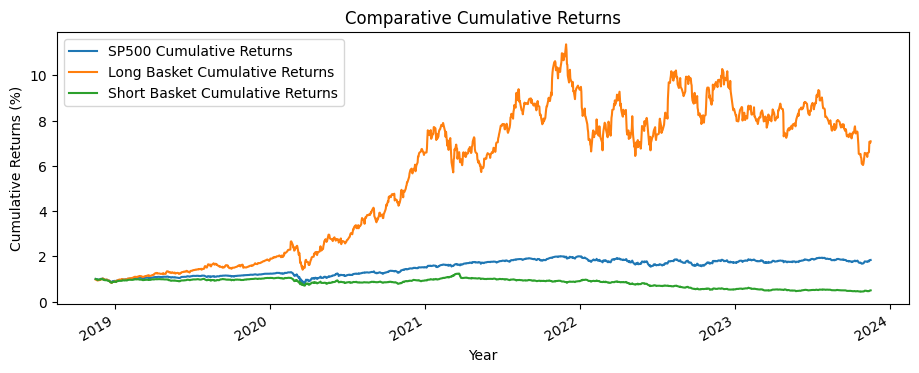

In [53]:
plt.figure(figsize=(11,4))
cumulative_returns.plot(label='SP500 Cumulative Returns')
long_cumulative_returns.plot(label='Long Basket Cumulative Returns')
short_cumulative_returns.plot(label='Short Basket Cumulative Returns')

plt.legend()
plt.title('Comparative Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()

In [54]:
long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')

Date
2018-12-17   -0.068959
2018-12-18   -0.048544
2018-12-19   -0.050196
2018-12-20   -0.055952
2018-12-21   -0.090692
                ...   
2023-11-13   -0.036008
2023-11-14    0.014168
2023-11-15    0.039984
2023-11-16    0.066980
2023-11-17    0.103991
Length: 1240, dtype: float64

## Monthly Long basket return bar chart (pos/neg coloring) vs SP500

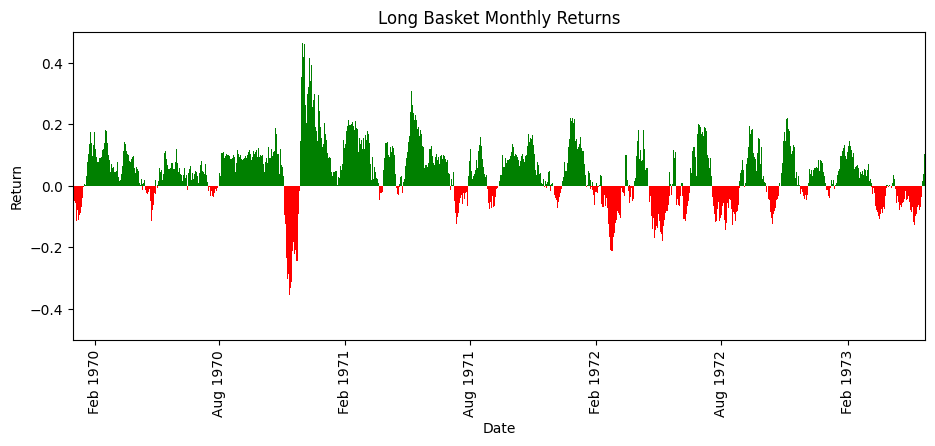

In [55]:

# Calculate 20-day returns, take the mean, drop NaNs, and plot
long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5)
plt.ylabel('Return')
plt.title('Long Basket Monthly Returns')
plt.show()

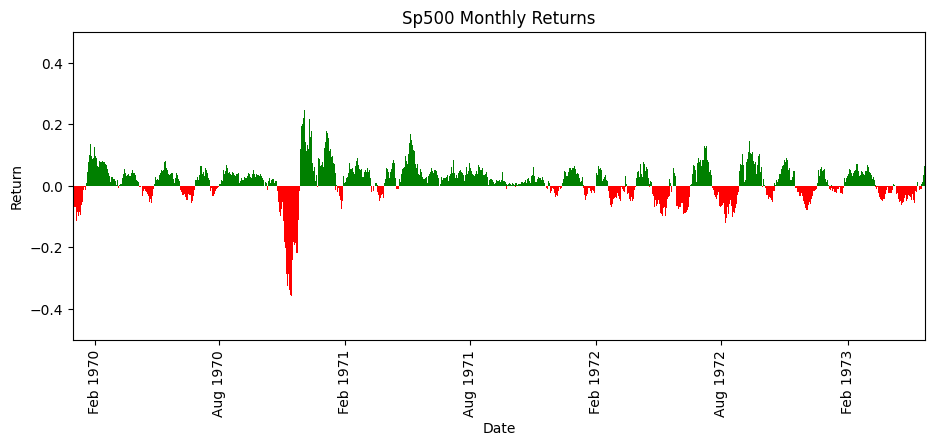

In [56]:

# Calculate 20-day returns, take the mean, drop NaNs, and plot
lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylabel('Return')
plt.ylim(-0.5, 0.5)
plt.title('Sp500 Monthly Returns')
plt.show()

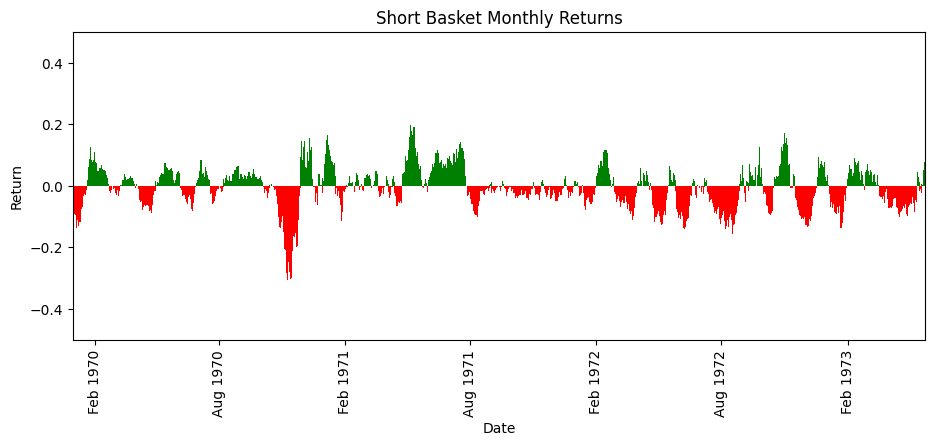

In [57]:
# Calculate 20-day returns, take the mean, drop NaNs, and plot
short_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in short_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5)
plt.ylabel('Return')
plt.title('Short Basket Monthly Returns')
plt.show()

## Monthly return for long picks vs short picks vs SP500

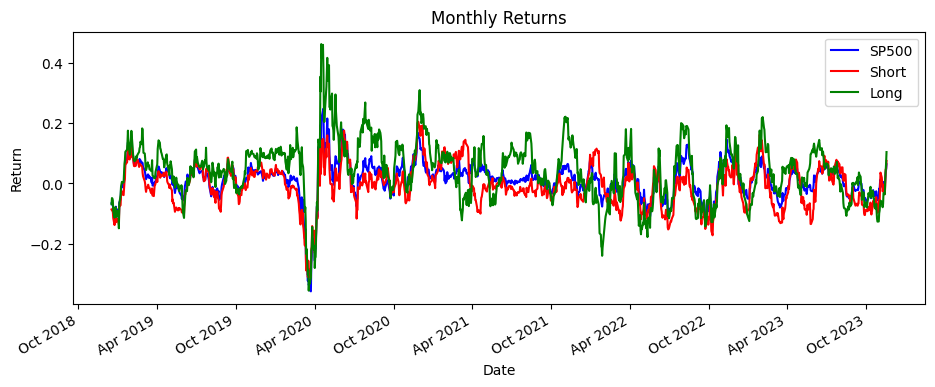

In [38]:
# monthly returns 
monthly_graph = pd.DataFrame()
lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'SP500', color ='blue')
short_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4),label= 'Short', color = 'red')
long_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'Long', color = 'green')
plt.legend()
plt.ylabel('Return')
# Set x-ticks to be months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('Monthly Returns')
plt.show()


